<a href="https://colab.research.google.com/github/riyagpt0251/air-quality-monitoring/blob/main/Air_quality_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt












load the dataset

In [22]:
# Step 1: Load the dataset
# Replace 'air_quality_data.csv' with your dataset's file path
file_path = 'AirQualityUCI.csv'

# Load the dataset with proper parsing of the semicolon delimiter
data = pd.read_csv(file_path, sep=';', engine='python')


data cleaning

In [23]:
# Step 2: Data Cleaning
# Strip extra spaces in column names
data.columns = data.columns.str.strip()

# Replace inconsistent spaces in numerical data with NaN
data.replace(r' +', np.nan, regex=True, inplace=True)

# Convert numerical columns to appropriate types (skipping Date and Time)
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Combine Date and Time into a single datetime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)

<ipython-input-23-e48134878382>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')


handle missing value

In [24]:
# Display the percentage of missing values per column
missing_values = data.isnull().mean() * 100
print("\nMissing Values (%):")
print(missing_values)

# Fill missing values using forward fill method


Missing Values (%):
CO(GT)            77.436385
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)         100.000000
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                 96.135572
RH                96.135572
AH                96.135572
Unnamed: 15      100.000000
Unnamed: 16      100.000000
DateTime         100.000000
dtype: float64


dataset overview

In [25]:
# Step 4: Dataset Overview
print("\nDataset Overview:")
print(data.head())

print("\nData Types After Cleaning:")
print(data.dtypes)

print("\nStatistical Summary:")
print(data.describe())



Dataset Overview:
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     NaN       1360.0     150.0       NaN         1046.0    166.0   
1     2.0       1292.0     112.0       NaN          955.0    103.0   
2     NaN       1402.0      88.0       NaN          939.0    131.0   
3     NaN       1376.0      80.0       NaN          948.0    172.0   
4     NaN       1272.0      51.0       NaN          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  Unnamed: 15  \
0        1056.0    113.0        1692.0       1268.0 NaN NaN NaN          NaN   
1        1174.0     92.0        1559.0        972.0 NaN NaN NaN          NaN   
2        1140.0    114.0        1555.0       1074.0 NaN NaN NaN          NaN   
3        1092.0    122.0        1584.0       1203.0 NaN NaN NaN          NaN   
4        1205.0    116.0        1490.0       1110.0 NaN NaN NaN          NaN   

   Unnamed: 16 DateTime  
0          NaN      NaT  
1          NaN      NaT  
2

filter numeric value

In [26]:
# Step 5: Filter Numeric Data for Correlation
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

plot the correlation heatmap

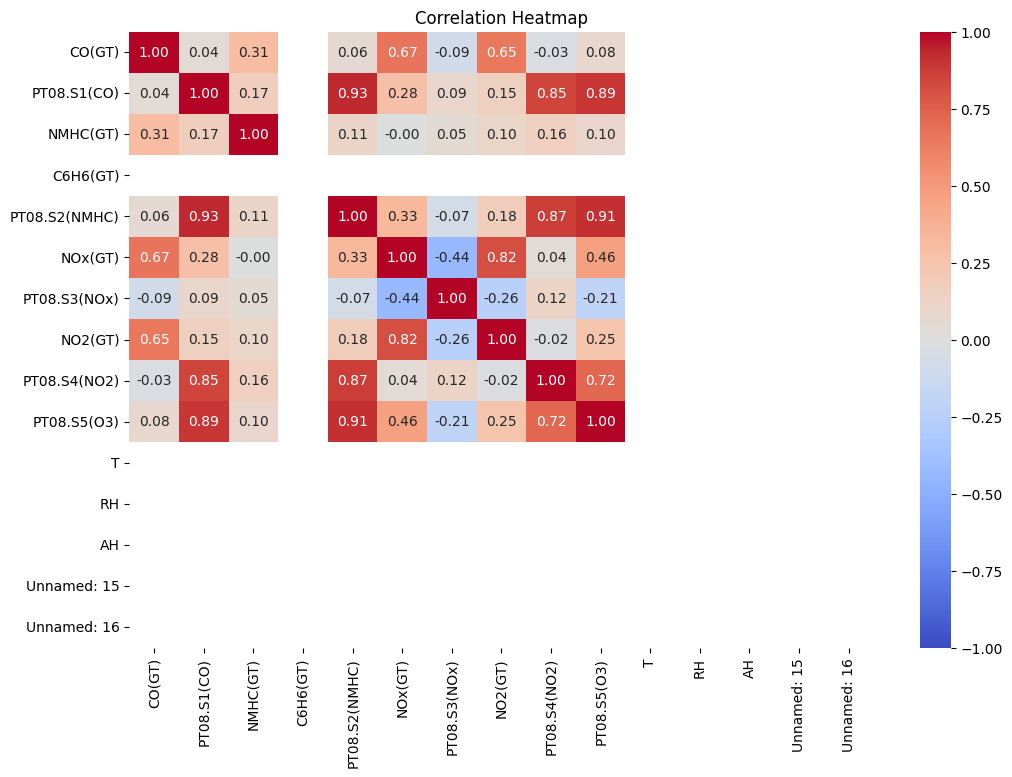

In [27]:
# Step 6: Plot the Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


visualize the value

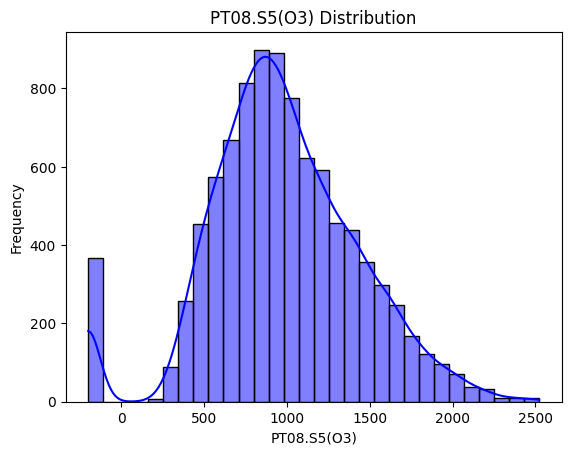

In [28]:
# Step 7: Visualize Key Metric Distribution
# Visualize the distribution of PT08.S5(O3) as an example pollutant
if 'PT08.S5(O3)' in data.columns:
    sns.histplot(data['PT08.S5(O3)'], bins=30, kde=True, color="blue")
    plt.title("PT08.S5(O3) Distribution")
    plt.xlabel("PT08.S5(O3)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'PT08.S5(O3)' not found in the dataset.")
